In [ ]:
#Most dominant colors extraction
'''
1. Get the image using cv2
2. Define number of clusters (dominant colors)
3. Convert to RGB vector space
4. Initialize K-Means clustering
5. Cluster centers are dominant colors
'''

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

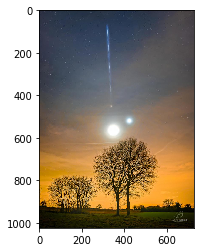

(1024, 729, 3)


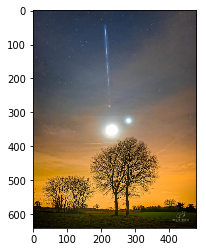

(640, 480, 3)


In [7]:
NC = 14         #number of clusters; 14 because Google says any image can be regenerated from 14 colour clusters

im = cv2.imread('./img.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im)
plt.show()

print im.shape

img = cv2.resize(im, (480, 640))
plt.imshow(img)
plt.show()

print img.shape

In [8]:
image_vector = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
print image_vector.shape

(307200, 3)


In [9]:
def dist(p1, p2):
    return np.sqrt(((p1 - p2)**2).sum())

def KMeansClustering(X_data, k=2, stop_iter=10, def_clusters=None):
    dim = X_data.shape[1]
    centers = np.random.uniform(low=X_data.min(), high=X_data.max(), size=(k, dim))
    
    clusters = {}
    labels = []
    
    for kx in range(k):
        clusters[kx] = {
            'center': centers[kx, :],
            'points': [],
        }
    
    curr_iter = 0
    while curr_iter < stop_iter:
        labels = []
        
        for px in range(X_data.shape[0]):
            distance_px = []
            for kx in range(k):
                distance_px.append(dist(X_data[px, :], clusters[kx]['center']))
            distance_px = np.asarray(distance_px)
            c_id = distance_px.argmin()
            clusters[c_id]['points'].append(X_data[px, :])
            labels.append(c_id)
        
        for kx in range(k):
            pts = np.asarray(clusters[kx]['points'])
            c = clusters[kx]['center']
            if len(clusters[kx]['points']) == 0:
                pass
            else:
                clusters[kx]['center'] = pts.mean(axis=0)
            clusters[kx]['points'] = []
        curr_iter += 1
        
    return clusters, labels

In [10]:
clusters, labels = KMeansClustering(image_vector, k=NC)
print clusters             #contains cluster-centers
print len(labels)          #contains cluster-center ID for each pixel in image_vector

{0: {'points': [], 'center': array([ 211.15226924,  139.63522254,   28.15627055])}, 1: {'points': [], 'center': array([ 179.97543484,  132.7742779 ,   80.48722216])}, 2: {'points': [], 'center': array([ 83.31704399,  82.75882569,  86.81781704])}, 3: {'points': [], 'center': array([ 181.24449377,  173.50947584,  159.06897729])}, 4: {'points': [], 'center': array([ 105.28764439,  107.75974701,  113.87837396])}, 5: {'points': [], 'center': array([ 131.44746978,   97.23047549,   59.48422765])}, 6: {'points': [], 'center': array([ 150.39556069,  129.39690788,  111.64196818])}, 7: {'points': [], 'center': array([  41.81337835,  232.00039381,  114.4787682 ])}, 8: {'points': [], 'center': array([ 40.12456173,  32.56387335,   5.44921446])}, 9: {'points': [], 'center': array([  37.28404289,   61.62833995,  229.71188465])}, 10: {'points': [], 'center': array([ 236.07632399,  237.54932503,  234.69781931])}, 11: {'points': [], 'center': array([ 238.12605992,  164.69283493,   66.16139062])}, 12: {'p

In [11]:
colors = []
for ix in clusters.keys():
    colors.append(clusters[ix]['center'].astype('uint8'))

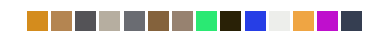

In [13]:
plt.figure(0)
for cols in range(len(colors)):
    cl = np.zeros((20,20,3))
    cl[:,:,:] = 255 - colors[cols]
    plt.subplot(1, NC, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

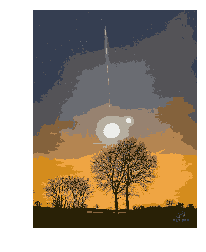

In [15]:
new_im = np.zeros((image_vector.shape))

for ix in range(new_im.shape[0]):
    new_im[ix, :] = 255 - colors[labels[ix]]
    
new_im = new_im.reshape(img.shape)

plt.figure(0)
plt.axis("off")
plt.imshow(new_im)
plt.show()

In [ ]:
'''
Implementing the same using sklearn
'''

In [16]:
km = KMeans(n_clusters = NC)
km.fit(image_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
colors = 255 - km.cluster_centers_.astype("uint8")      #because processing in CMY - complement of RGB
print colors

[[141 175 223]
 [ 38 113 233]
 [205 195 175]
 [ 95 129 159]
 [230 234 252]
 [ 25  23  27]
 [175 174 168]
 [  9  87 194]
 [150 147 140]
 [193 206 246]
 [ 49 106 176]
 [127 155 178]
 [ 82  90 104]
 [ 85 136 203]]


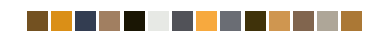

In [18]:
plt.figure(0)
for cols in range(colors.shape[0]):
    cl = np.zeros((20,20,3))
    cl[:,:,:] = colors[cols]
    plt.subplot(1, NC, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

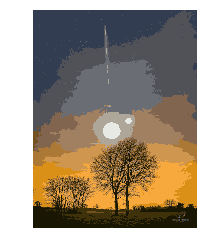

In [19]:
new_im = np.zeros((image_vector.shape))

for ix in range(new_im.shape[0]):
    new_im[ix, :] = colors[km.labels_[ix]]
    
new_im = new_im.reshape(img.shape)

plt.figure(0)
plt.axis("off")
plt.imshow(new_im)
plt.show()

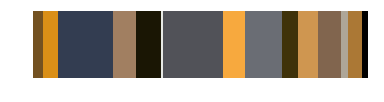

In [20]:
dom_cols = np.unique(km.labels_, return_counts=True)
lab = dom_cols[0]
hist = dom_cols[1].astype("float")/dom_cols[1].sum()

col_sp = np.zeros((100, 500, 3))
start = 0
for (col, percent) in zip(lab, hist):
    end = int(start + percent * col_sp.shape[1])
    col_sp[:, start:end, :] = colors[col]
    start = end

plt.figure(0)
plt.axis("off")
plt.imshow(col_sp)

plt.show()